# Image Classification on Food 101

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaadRasheed-exe/Image-Classification-on-Food-101/blob/master)

This project aims to classify images in the [Food 101 Dataset.][]


[Food 101 Dataset.]: https://www.kaggle.com/datasets/dansbecker/food-101 "Kaggle"



## Imports and Downloads

In [2]:
!wget https://raw.githubusercontent.com/SaadRasheed-exe/Image-Classification-on-Food-101/master/helper.py

--2022-08-06 11:49:44--  https://raw.githubusercontent.com/SaadRasheed-exe/Image-Classification-on-Food-101/master/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2089 (2.0K) [text/plain]
Saving to: 'helper.py'

     0K ..                                                    100% 6.14M=0s

2022-08-06 11:49:45 (6.14 MB/s) - 'helper.py' saved [2089/2089]



In [6]:
# imports all the required libraries
from helper import *

### Download Dataset from Kaggle

Upload your [Kaggle API Token.][]

[Kaggle API Token.]: https://www.kaggle.com/docs/api "Kaggle"

In [ ]:
from google.colab import files
files.upload()

In [21]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dansbecker/food-101
!unzip ./food-101

The syntax of the command is incorrect.


## Data Exploration

In [1]:
os.listdir('./food-101')

['.DS_Store',
 'baseline',
 'images',
 'license_agreement.txt',
 'meta',
 'README.txt']

In [1]:
os.listdir('./food-101/food-101')

['.DS_Store',
 'baseline',
 'images',
 'license_agreement.txt',
 'meta',
 'README.txt']

In [4]:
dataset_dir = './food-101/food-101'

**images** contains 101 folders, each with a 1000 images.\
Each folder represents a class of food.

In [3]:
for dirpath, dirnames, filenames in os.walk(dataset_dir):
    print(f"There are {len(filenames)} files and {len(dirnames)} directories in {dirpath}.")

There are 3 files and 3 directories in ./food-101/food-101.
There are 0 files and 0 directories in ./food-101/food-101\baseline.
There are 1 files and 101 directories in ./food-101/food-101\images.
There are 1000 files and 0 directories in ./food-101/food-101\images\apple_pie.
There are 1000 files and 0 directories in ./food-101/food-101\images\baby_back_ribs.
There are 1000 files and 0 directories in ./food-101/food-101\images\baklava.
There are 1000 files and 0 directories in ./food-101/food-101\images\beef_carpaccio.
There are 1000 files and 0 directories in ./food-101/food-101\images\beef_tartare.
There are 1000 files and 0 directories in ./food-101/food-101\images\beet_salad.
There are 1000 files and 0 directories in ./food-101/food-101\images\beignets.
There are 1000 files and 0 directories in ./food-101/food-101\images\bibimbap.
There are 1000 files and 0 directories in ./food-101/food-101\images\bread_pudding.
There are 1000 files and 0 directories in ./food-101/food-101\images

In [4]:
os.listdir(os.path.join(dataset_dir, 'meta'))

['classes.txt',
 'labels.txt',
 'test.json',
 'test.txt',
 'train.json',
 'train.txt']

**train.json** contains the names of images belonging to the training set.\
**test.json** contains the names of images belonging to the validation set.

In [7]:
pd.read_json(dataset_dir + '/meta/train.json').head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


## Preprocessing Data into Training and Testing Sets

In [7]:
# path to training and testing images stored together
image_dir = os.path.join(dataset_dir, 'images')

# paths for preprocessed data
data_dir = './data'
train_data_dir = './data/train/'
test_data_dir = './data/test/'

ext = '.jpg'
json_df = {'train': pd.read_json('./food-101/food-101/meta/train.json'), 'test': pd.read_json('./food-101/food-101/meta/test.json')}
labels = json_df['train'].columns

In [9]:
# Create directories and sub-directories for processed data
for split in ['train', 'test']:
    for label in labels:
        final_path = os.path.join(data_dir, split, label)
        os.makedirs(final_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './data\\train\\churros'

In [ ]:
global_split = 'train'

# function to move files into train and test folders in data
def move_to_folder(entry):
    if type(entry) == pd.core.series.Series:
        entry.apply(move_to_folder)
    else:
        shutil.move(os.path.join(image_dir, entry + ext), os.path.join(data_dir, global_split, entry.split('/')[0]))
    return entry

In [ ]:
# moving all images to their respective sub-directories
for split in ['train', 'test']:
    global_split = split
    json_df[split].apply(move_to_folder)

## Data Visualization

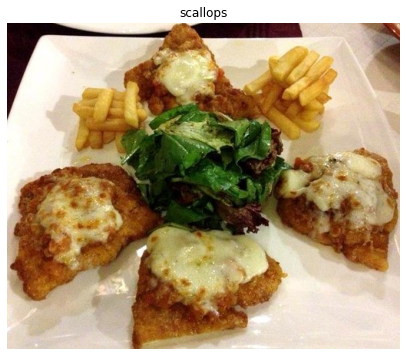

In [8]:
# display random images from the training set
view_random_image(data_dir=data_dir, labels=labels, split='train')

## **Model Experimentations**

**Fine tuning** a [InceptionV3 Pretrained][] model on Food-101 dataset.

[InceptionV3 Pretrained]: https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5 "TensorFlow"

In [9]:
# Image size that can be fed to the model (height into width)
IMG_SIZE = (224, 224)

# Color channels of the images (RGB)
COLOR_CHNLS = 3

# batch size for minibatches
BATCH_SIZE = 32

### Creating a subset (4 classes) of the data for experimenting

In [10]:
# number of labels to choose
n_classes = 4

# choosing 4 random labels
mini_labels = np.random.choice(os.listdir(os.path.join(data_dir, 'train')), size=n_classes)

# paths to the data subset
mini_train_dir = './subset_4/train'
mini_test_dir = './subset_4/test'

In [11]:
# labels chosen are:
mini_labels

array(['macaroni_and_cheese', 'oysters', 'chocolate_cake', 'pancakes'],
      dtype='<U23')

In [12]:
# creating a train subset with 4 classes
create_data_subset(train_data_dir, mini_train_dir, subset_labels=mini_labels)

# creating a test subset with the 4 labels
create_data_subset(test_data_dir, mini_test_dir, subset_labels=mini_labels)

### Generating Tensors from Images

* Data is stored in respective `tf.data.Dataset` objects.
* Images are resized to 224 by 224.

In [13]:
# Training Set
mini_train_data = tf.keras.utils.image_dataset_from_directory(mini_train_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE)

# Validation Set
mini_test_data = tf.keras.utils.image_dataset_from_directory(mini_test_dir,
                                                            image_size=IMG_SIZE,
                                                            label_mode='categorical',
                                                            batch_size=BATCH_SIZE)

Found 3000 files belonging to 4 classes.
Found 1000 files belonging to 4 classes.


### Baseline Model

Training Images are modified during training according to following parameters:
* Max 20% rotation.
* Max 20% width shift.
* Max 20% height shift.
* Max 20% zoom.
* Possible horizontal flip.

In [77]:
# Data Augmentation Layers
data_augmentation = Sequential(name='data_augmentation')

data_augmentation.add(tf.keras.layers.RandomFlip('horizontal'))
data_augmentation.add(tf.keras.layers.RandomWidth(0.2))
data_augmentation.add(tf.keras.layers.RandomHeight(0.2))
data_augmentation.add(tf.keras.layers.RandomRotation(0.2))
data_augmentation.add(tf.keras.layers.RandomZoom(0.2))

In [78]:
# inputs layer to the model
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(COLOR_CHNLS,), name='input')

# inceptionv3 layers with the weights are frozen
base = tf.keras.applications.InceptionV3(include_top=False)
base.trainable = False

# model structure
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)

# output layer
outputs = tf.keras.layers.Dense(n_classes, activation='softmax', name='output')(x)

# model
model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [79]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_avg_pooling (GlobalA  (None, 2048)             0         
 veragePooling2D)                                                
                                                                 
 output (Dense)              (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
___________________________________________

In [80]:
# checkpoint to store the model at each epoch
checkpoint = callbacks.ModelCheckpoint('Checkpoints/Model_001', monitor='val_loss', save_best_only=True, verbose=1)

In [81]:
# training the model
history = model.fit(mini_train_data,
                    epochs=15,
                    steps_per_epoch=len(mini_train_data),
                    validation_data=mini_test_data,
                    validation_steps=int(0.25 * len(mini_test_data)), # validating on 25% of testing data
                    callbacks=[checkpoint])

Epoch 1/15
94/94 [==============================] - ETA: 0s - loss: 0.5443 - accuracy: 0.7937
Epoch 1: val_loss improved from inf to 0.27482, saving model to Checkpoints\Model_001


INFO:tensorflow:Assets written to: Checkpoints\Model_001\assets


INFO:tensorflow:Assets written to: Checkpoints\Model_001\assets


94/94 [==============================] - 414s 4s/step - loss: 0.5443 - accuracy: 0.7937 - val_loss: 0.2748 - val_accuracy: 0.9062
Epoch 2/15
94/94 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.9113
Epoch 2: val_loss improved from 0.27482 to 0.17551, saving model to Checkpoints\Model_001


INFO:tensorflow:Assets written to: Checkpoints\Model_001\assets


INFO:tensorflow:Assets written to: Checkpoints\Model_001\assets


94/94 [==============================] - 419s 4s/step - loss: 0.2618 - accuracy: 0.9113 - val_loss: 0.1755 - val_accuracy: 0.9336
Epoch 3/15
94/94 [==============================] - ETA: 0s - loss: 0.2162 - accuracy: 0.9313
Epoch 3: val_loss did not improve from 0.17551
94/94 [==============================] - 390s 4s/step - loss: 0.2162 - accuracy: 0.9313 - val_loss: 0.2097 - val_accuracy: 0.9297
Epoch 4/15
94/94 [==============================] - ETA: 0s - loss: 0.1851 - accuracy: 0.9380
Epoch 4: val_loss improved from 0.17551 to 0.17167, saving model to Checkpoints\Model_001


INFO:tensorflow:Assets written to: Checkpoints\Model_001\assets


INFO:tensorflow:Assets written to: Checkpoints\Model_001\assets


94/94 [==============================] - 428s 5s/step - loss: 0.1851 - accuracy: 0.9380 - val_loss: 0.1717 - val_accuracy: 0.9453
Epoch 5/15
94/94 [==============================] - ETA: 0s - loss: 0.1626 - accuracy: 0.9457
Epoch 5: val_loss did not improve from 0.17167
94/94 [==============================] - 354s 4s/step - loss: 0.1626 - accuracy: 0.9457 - val_loss: 0.1904 - val_accuracy: 0.9141
Epoch 6/15
94/94 [==============================] - ETA: 0s - loss: 0.1445 - accuracy: 0.9557
Epoch 6: val_loss did not improve from 0.17167
94/94 [==============================] - 355s 4s/step - loss: 0.1445 - accuracy: 0.9557 - val_loss: 0.1814 - val_accuracy: 0.9258
Epoch 7/15
94/94 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9583
Epoch 7: val_loss did not improve from 0.17167
94/94 [==============================] - 348s 4s/step - loss: 0.1270 - accuracy: 0.9583 - val_loss: 0.1766 - val_accuracy: 0.9297
Epoch 8/15
94/94 [==============================] - ETA: 

KeyboardInterrupt: 

Model is 97.4% accurate on the 4 classes.

In [71]:
model.evaluate(mini_test_data)

32/32 [==============================] - 49s 2s/step - loss: 0.0759 - accuracy: 0.9740


[0.07585081458091736, 0.9739999771118164]

### Model Evaluation for Baseline

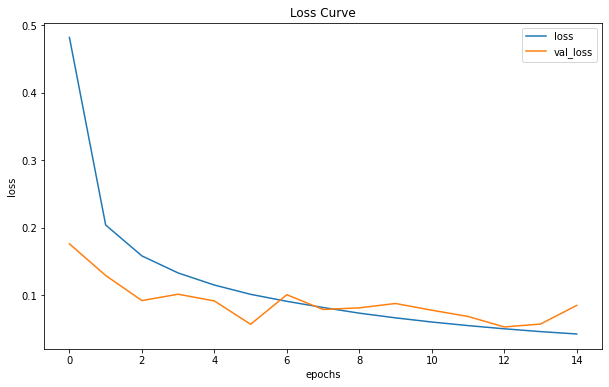

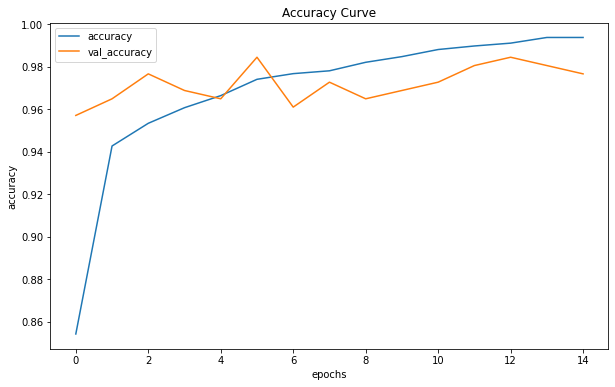

In [72]:
plot_loss_metrics(history=history, metrics=['accuracy'], validation_metrics=True)

In [66]:
# getting predictions from the model
y_true = []
y_pred = []

for features, labels in mini_test_data:
    y_true = np.concatenate([y_true, np.argmax(labels, axis=1)], axis=0)
    y_pred = np.concatenate([y_pred, model.predict(features, verbose=0).argmax(1)], axis=0)

In [69]:
# Classification Report on the predictions
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=mini_test_data.class_names))

                     precision    recall  f1-score   support

     chocolate_cake       0.97      0.98      0.97       250
macaroni_and_cheese       0.97      0.99      0.98       250
            oysters       0.98      0.98      0.98       250
           pancakes       0.98      0.95      0.96       250

           accuracy                           0.97      1000
          macro avg       0.97      0.97      0.97      1000
       weighted avg       0.97      0.97      0.97      1000



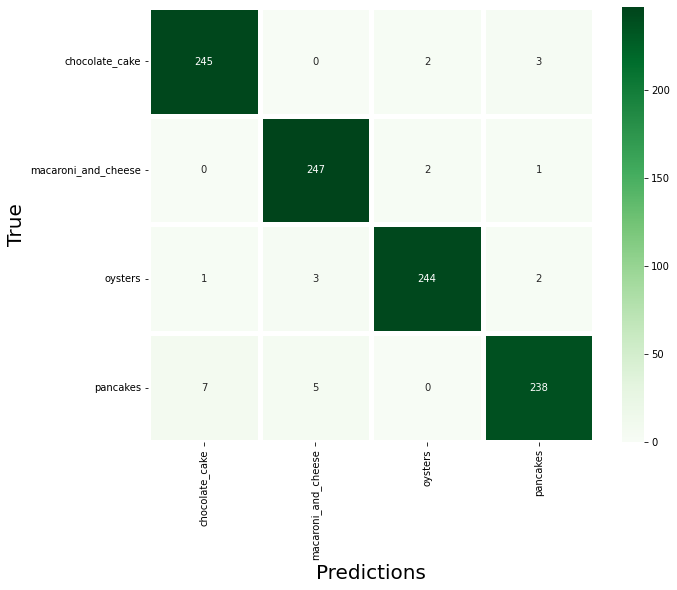

In [70]:
# Confusion Matrix for the predictions
confusion_matrix_heatmap(y_true, y_pred, mini_train_data.class_names)